# Preprocessing and Feature Engineering


### Importing packages


In [250]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import torch

### Loading data


In [239]:
norm = True

data = pd.read_csv("consumption_and_temperatures.csv")
data.tail()

,timestamp,NO1_consumption,NO1_temperature,NO2_consumption,NO2_temperature,NO3_consumption,NO3_temperature,NO4_consumption,NO4_temperature,NO5_consumption,NO5_temperature
58459,2023-12-31 19:00:00+00:00,5608.067736,-4.7,4962.057148,4.1,3837.204332,-3.7,2806.182692,-6.5,2224.449164,6.3
58460,2023-12-31 20:00:00+00:00,5469.722792,-4.6,4864.162484,4.7,3773.021260,-3.6,2764.928700,-6.4,2175.957992,6.3
58461,2023-12-31 21:00:00+00:00,5321.221040,-4.5,4793.361440,4.6,3725.022064,-4.2,2738.213476,-6.4,2137.724404,6.2
58462,2023-12-31 22:00:00+00:00,5222.770756,-4.5,4742.807424,4.6,3668.956000,-4.2,2699.056760,-6.5,2110.928436,5.7
58463,2023-12-31 23:00:00+00:00,5210.969016,-4.4,4719.826460,4.4,3657.079824,-4.0,2696.672540,-6.6,2100.524368,5.7


## Preprocessing


### Checking for holes


In [240]:
data.isna().sum()

timestamp          0
NO1_consumption    0
NO1_temperature    0
NO2_consumption    0
NO2_temperature    0
NO3_consumption    0
NO3_temperature    0
NO4_consumption    0
NO4_temperature    0
NO5_consumption    0
NO5_temperature    0
dtype: int64

### Converting timestamp to datetime and set as index


In [241]:
data["timestamp"] = pd.to_datetime(data["timestamp"])
data.set_index("timestamp", inplace=True)
data.head()

,NO1_consumption,NO1_temperature,NO2_consumption,NO2_temperature,NO3_consumption,NO3_temperature,NO4_consumption,NO4_temperature,NO5_consumption,NO5_temperature
timestamp,,,,,,,,,,
2017-05-01 00:00:00+00:00,3325.431995,2.1,3534.588,5.0,2674.838,5.5,2061.209,0.2,1609.089,3.9
2017-05-01 01:00:00+00:00,3344.690998,1.8,3560.209,4.1,2678.188,4.0,2045.436,0.1,1623.485,3.2
2017-05-01 02:00:00+00:00,3398.359002,3.2,3596.149,3.1,2678.341,3.7,2020.007,0.1,1634.128,2.7
2017-05-01 03:00:00+00:00,3430.220001,3.6,3594.042,2.3,2684.172,3.2,2021.920,0.1,1647.906,2.3
2017-05-01 04:00:00+00:00,3606.750000,3.4,3665.091,2.6,2733.345,2.7,2045.913,0.1,1679.176,2.3


### Splitting temperature and consumption


In [242]:
temp_features = [
    "NO1_temperature",
    "NO2_temperature",
    "NO3_temperature",
    "NO4_temperature",
    "NO5_temperature",
]

cons_features = [
    "NO1_consumption",
    "NO2_consumption",
    "NO3_consumption",
    "NO4_consumption",
    "NO5_consumption",
]

temp = data[temp_features]
cons = data[cons_features]

temp.head()

,NO1_temperature,NO2_temperature,NO3_temperature,NO4_temperature,NO5_temperature
timestamp,,,,,
2017-05-01 00:00:00+00:00,2.1,5.0,5.5,0.2,3.9
2017-05-01 01:00:00+00:00,1.8,4.1,4.0,0.1,3.2
2017-05-01 02:00:00+00:00,3.2,3.1,3.7,0.1,2.7
2017-05-01 03:00:00+00:00,3.6,2.3,3.2,0.1,2.3
2017-05-01 04:00:00+00:00,3.4,2.6,2.7,0.1,2.3


### Plotting data


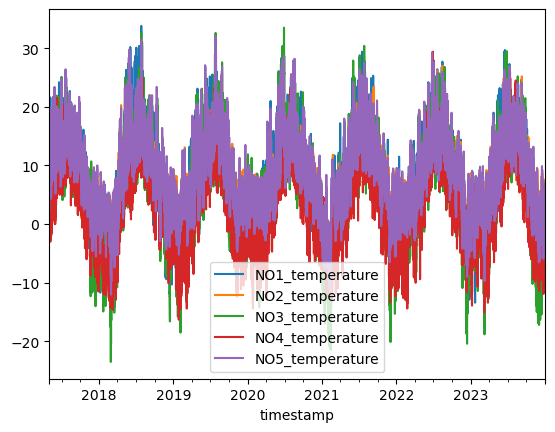

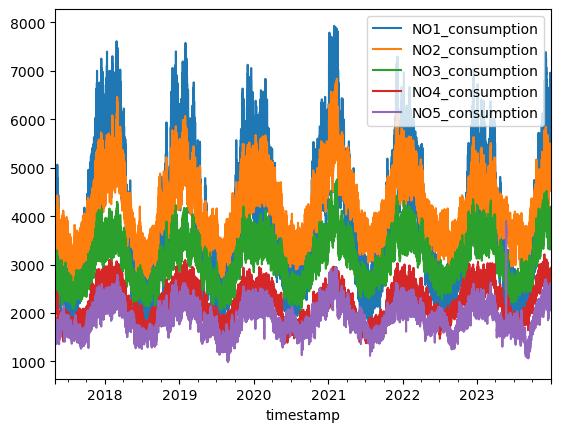

In [243]:
temp.plot()
cons.plot()
plt.show()

### Identifying spikes and replacing with holes


In [244]:
def remove_spikes(data, threshold=3.2):
    tensor = torch.tensor(data.values)
    mean = tensor.mean()
    std = tensor.std()
    z_scores = (tensor - mean) / std
    spike_indices = (z_scores > threshold) | (z_scores < -threshold)
    tensor[spike_indices] = float("nan")
    return pd.DataFrame(tensor, index=data.index, columns=data.columns)


temp = remove_spikes(temp)
cons = remove_spikes(cons)
temp.isna().sum(), cons.isna().sum()

(NO1_temperature     17
 NO2_temperature      6
 NO3_temperature    243
 NO4_temperature      0
 NO5_temperature      7
 dtype: int64,
 NO1_consumption    1129
 NO2_consumption       2
 NO3_consumption       0
 NO4_consumption       0
 NO5_consumption       0
 dtype: int64)

### Replacing holes with interpolation


In [245]:
temp = temp.interpolate()
cons = cons.interpolate()
type(temp)

pandas.core.frame.DataFrame

### Plotting without spikes


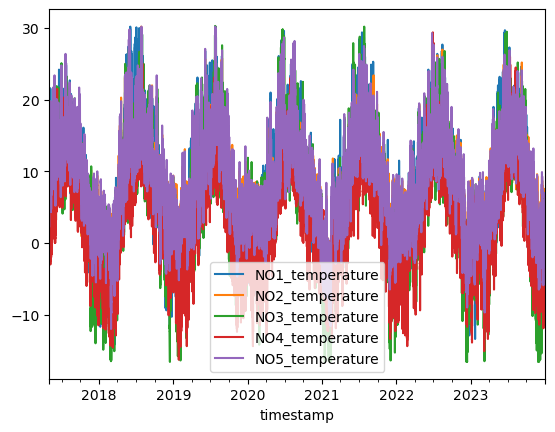

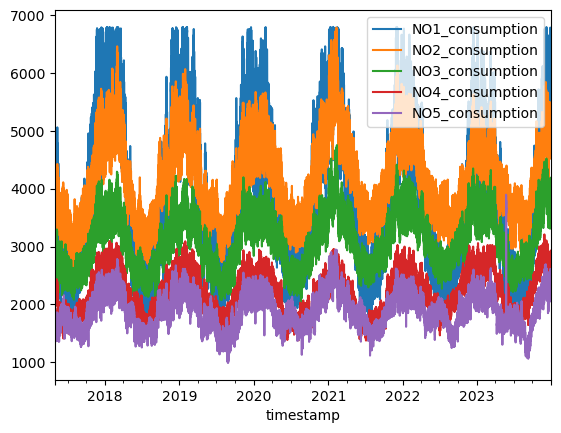

In [246]:
temp.plot()
cons.plot()
plt.show()

### Merging data without spikes


In [247]:
data = pd.concat([temp, cons], axis=1)
data.head()

,NO1_temperature,NO2_temperature,NO3_temperature,NO4_temperature,NO5_temperature,NO1_consumption,NO2_consumption,NO3_consumption,NO4_consumption,NO5_consumption
timestamp,,,,,,,,,,
2017-05-01 00:00:00+00:00,2.1,5.0,5.5,0.2,3.9,3325.431995,3534.588,2674.838,2061.209,1609.089
2017-05-01 01:00:00+00:00,1.8,4.1,4.0,0.1,3.2,3344.690998,3560.209,2678.188,2045.436,1623.485
2017-05-01 02:00:00+00:00,3.2,3.1,3.7,0.1,2.7,3398.359002,3596.149,2678.341,2020.007,1634.128
2017-05-01 03:00:00+00:00,3.6,2.3,3.2,0.1,2.3,3430.220001,3594.042,2684.172,2021.920,1647.906
2017-05-01 04:00:00+00:00,3.4,2.6,2.7,0.1,2.3,3606.750000,3665.091,2733.345,2045.913,1679.176


### Lag features


In [248]:
data["lagged_NO1_1h"] = data["NO1_consumption"].shift(1)
data["lagged_NO2_1h"] = data["NO2_consumption"].shift(1)
data["lagged_NO3_1h"] = data["NO3_consumption"].shift(1)
data["lagged_NO4_1h"] = data["NO4_consumption"].shift(1)
data["lagged_NO5_1h"] = data["NO5_consumption"].shift(1)

data.head()

,NO1_temperature,NO2_temperature,NO3_temperature,NO4_temperature,NO5_temperature,NO1_consumption,NO2_consumption,NO3_consumption,NO4_consumption,NO5_consumption,lagged_NO1_1h,lagged_NO2_1h,lagged_NO3_1h,lagged_NO4_1h,lagged_NO5_1h
timestamp,,,,,,,,,,,,,,,
2017-05-01 00:00:00+00:00,2.1,5.0,5.5,0.2,3.9,3325.431995,3534.588,2674.838,2061.209,1609.089,NaN,NaN,NaN,NaN,NaN
2017-05-01 01:00:00+00:00,1.8,4.1,4.0,0.1,3.2,3344.690998,3560.209,2678.188,2045.436,1623.485,3325.431995,3534.588,2674.838,2061.209,1609.089
2017-05-01 02:00:00+00:00,3.2,3.1,3.7,0.1,2.7,3398.359002,3596.149,2678.341,2020.007,1634.128,3344.690998,3560.209,2678.188,2045.436,1623.485
2017-05-01 03:00:00+00:00,3.6,2.3,3.2,0.1,2.3,3430.220001,3594.042,2684.172,2021.920,1647.906,3398.359002,3596.149,2678.341,2020.007,1634.128
2017-05-01 04:00:00+00:00,3.4,2.6,2.7,0.1,2.3,3606.750000,3665.091,2733.345,2045.913,1679.176,3430.220001,3594.042,2684.172,2021.920,1647.906


### Divide each bidding area and dump


In [249]:
next_cons = data[cons_features].rename(
    columns={f"NO{i}_consumption": f"NO{i}" for i in range(1, 6)}
)
temp = data[temp_features].rename(
    columns={f"NO{i}_temperature": f"NO{i}" for i in range(1, 6)}
)

cons = data[
    [
        "lagged_NO1_1h",
        "lagged_NO2_1h",
        "lagged_NO3_1h",
        "lagged_NO4_1h",
        "lagged_NO5_1h",
    ]
].rename(columns={f"lagged_NO{i}_1h": f"NO{i}" for i in range(1, 6)})

data = (
    pd.concat(
        [temp, cons, next_cons],
        axis=1,
        keys=["temperature", "consumption", "next_consumption"],
    )
    .swaplevel(axis=1)
    .dropna()
)

data = data[sorted(list(data.columns))]

data_directory = "data"

if not os.path.exists(data_directory):
    os.makedirs(data_directory)

data["NO1"].to_csv("./data/NO1.csv", index=True)
data["NO2"].to_csv("./data/NO2.csv", index=True)
data["NO3"].to_csv("./data/NO3.csv", index=True)
data["NO4"].to_csv("./data/NO4.csv", index=True)
data["NO5"].to_csv("./data/NO5.csv", index=True)